In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('max_colwidth', 500)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Load files
# train = pd.read_csv('train_mean.csv')
# test = pd.read_csv('test_mean.csv')
# samplesubmission = pd.read_csv('newData/SampleSubmission.csv')
# variable_definations = pd.read_csv('newData/VariableDefinitions.csv')


# Load files
train = pd.read_csv('UMOJA/ForwardFill.csv')
test = pd.read_csv('UMOJA/Test2.csv')
samplesubmission = pd.read_csv('newData/SampleSubmission.csv')
variable_definations = pd.read_csv('newData/VariableDefinitions.csv')

In [3]:
train.head()


,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170.0,66,2,0,0,1,0,...,1,2,0,1,2,2,2,1,1,0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023.0,44,2,0,2,2,2,...,1,2,0,2,2,2,1,1,1,1
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170.0,29,1,1,1,2,2,...,1,1,2,2,2,2,1,1,1,0
3,ID_0000144505,Canada,High income: OECD,30491168.0,44,1,1,1,1,1,...,1,1,2,1,2,2,1,1,1,1
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320.0,36,2,1,1,1,1,...,1,2,2,1,2,2,2,1,1,1


In [4]:
test.head()


,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28
0,ID_0000005111,Croatia,Europe & Central Asia (excluding high income),3557444.5,62,2,0,0,2,2,...,2,2,1,1,2,2,2,0,1,1
1,ID_0000389416,Kazakhstan,Europe & Central Asia (excluding high income),12920168.0,32,2,0,0,0,0,...,2,2,2,0,2,2,2,2,1,2
2,ID_0000634789,Costa Rica,Latin America & Caribbean (excluding high income),3791520.0,73,1,1,1,2,2,...,2,2,2,0,2,1,2,1,1,1
3,ID_0000778100,Japan,High income: OECD,110566824.0,67,1,1,1,1,2,...,0,1,1,2,1,1,0,0,1,0
4,ID_0001123210,Morocco,Middle East & North Africa (excluding high income),25550170.0,32,1,1,1,2,2,...,1,2,2,0,2,2,2,2,1,1


In [5]:
samplesubmission.head()

,ID,target
0,ID_0000005111,NaN
1,ID_0000389416,NaN
2,ID_0000634789,NaN
3,ID_0000778100,NaN
4,ID_0001123210,NaN


In [6]:
variable_definations

,ID,Person unique/random identification,"For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer"
0,country,The country,NaN
1,region,"Region of a given country,.i.e., South Asia, Europe, etc",NaN
2,population,The population of the given country,NaN
3,age,Individual age,NaN
4,Q1,Has ATM/debit card,NaN
5,Q2,Is the ATM connect to an account with your name?,NaN
6,Q3,Purchased with the ATM,NaN
7,Q4,Use of mobile or internet to make payments or send money,NaN
8,Q5,Mobile/internet to check account balance,NaN
9,Q6,Has a credit card,NaN


In [7]:
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (104867, 36)
The shape of the test set is: (44943, 35)


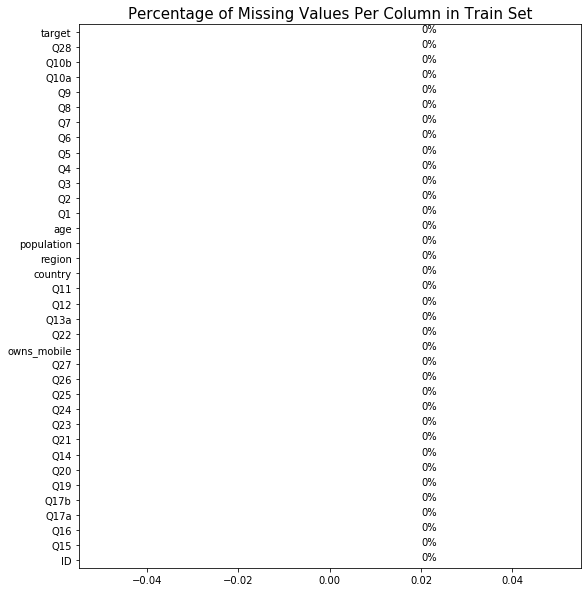

In [8]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

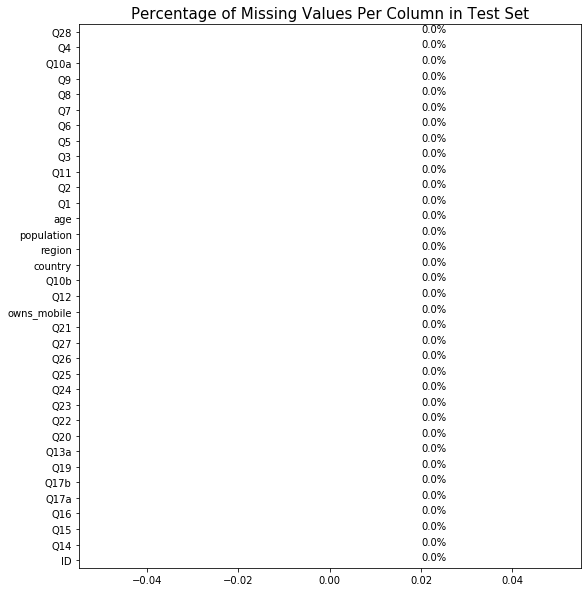

In [9]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [10]:
train.duplicated().any(), test.duplicated().any()

(False, False)

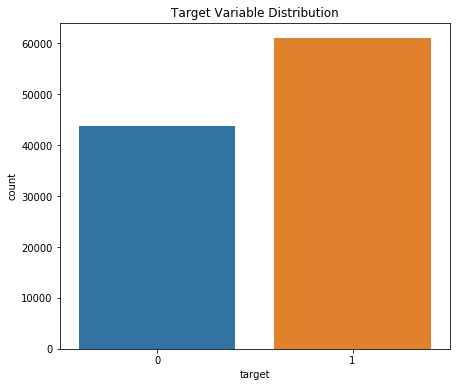

In [11]:
plt.figure(figsize=(7, 6))
sns.countplot(train.target)
plt.title('Target Variable Distribution');

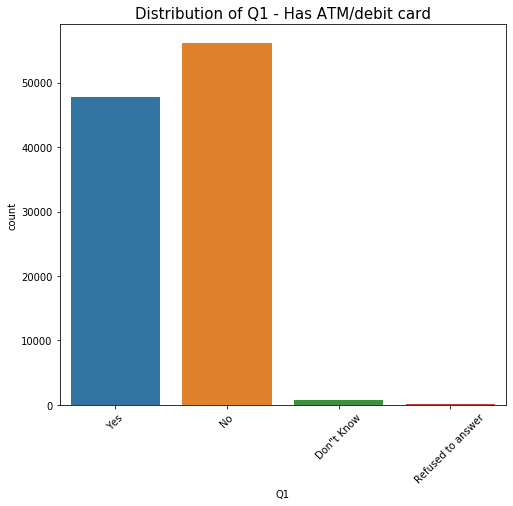

In [12]:
# Q1 - Has ATM/debit card
plt.figure(figsize=(8, 7))
ax =sns.countplot(train.Q1)
ax.set_xticklabels(['Yes', 'No', 'Don"t Know', 'Refused to answer'], rotation=45 )
plt.title('Distribution of Q1 - Has ATM/debit card', fontdict = {'size': 15});

In [13]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (149810, 36)


In [14]:
# Check the column names and datatypes
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           149810 non-null  object 
 1   country      149810 non-null  object 
 2   region       149810 non-null  object 
 3   population   149810 non-null  float64
 4   age          149810 non-null  int64  
 5   Q1           149810 non-null  int64  
 6   Q2           149810 non-null  int64  
 7   Q3           149810 non-null  int64  
 8   Q4           149810 non-null  int64  
 9   Q5           149810 non-null  int64  
 10  Q6           149810 non-null  int64  
 11  Q7           149810 non-null  int64  
 12  Q8           149810 non-null  int64  
 13  Q9           149810 non-null  int64  
 14  Q10a         149810 non-null  int64  
 15  Q10b         149810 non-null  int64  
 16  Q11          149810 non-null  int64  
 17  Q12          149810 non-null  int64  
 18  Q13a         149810 non-

In [15]:
# Category columns
cat_cols = ['country',	'region', 'owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
num_cols = ['age', 'population']

# Change columns to their respective datatypes
all_data[cat_cols] = all_data[cat_cols].astype('category')

# Confirm whether the changes have been successful
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ID           149810 non-null  object  
 1   country      149810 non-null  category
 2   region       149810 non-null  category
 3   population   149810 non-null  float64 
 4   age          149810 non-null  int64   
 5   Q1           149810 non-null  category
 6   Q2           149810 non-null  category
 7   Q3           149810 non-null  category
 8   Q4           149810 non-null  category
 9   Q5           149810 non-null  category
 10  Q6           149810 non-null  category
 11  Q7           149810 non-null  category
 12  Q8           149810 non-null  category
 13  Q9           149810 non-null  category
 14  Q10a         149810 non-null  category
 15  Q10b         149810 non-null  category
 16  Q11          149810 non-null  category
 17  Q12          149810 non-null  category
 18  Q13a

In [16]:
# Check unique values for each categorical column
for col in cat_cols:
  print(col, all_data[col].nunique())

country 144
region 9
owns_mobile 5
Q1 4
Q2 5
Q3 5
Q4 5
Q5 5
Q6 4
Q7 5
Q8 5
Q9 5
Q10a 4
Q10b 4
Q11 4
Q12 4
Q13a 4
Q14 4
Q15 4
Q16 4
Q17a 4
Q17b 4
Q19 5
Q20 5
Q21 4
Q22 4
Q23 5
Q24 4
Q25 4
Q26 5
Q27 5
Q28 5


In [17]:
# Fill in missing values
# For cat cols and date cols fill in with mode and for num cols fill in with 9999
for col in all_data.columns:
  if col in cat_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
  elif col in num_cols:
    all_data[col] = all_data[col].fillna(all_data[col].fillna(9999))

# Confirm that there aren't any missing values
all_data[all_data.columns.difference(['target'])].isna().sum().any()

False

In [18]:
# Shape of data before encoding
all_data.shape

(149810, 36)

In [19]:
# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
all_data = pd.get_dummies(data = all_data, columns = cat_cols)
all_data.head()

,ID,population,age,target,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,...,Q27_0,Q27_1,Q27_2,Q27_3,Q27_4,Q28_0,Q28_1,Q28_2,Q28_3,Q28_4
0,ID_0000020532,25550170.0,66,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,ID_0000075765,4591023.0,44,1.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,ID_0000085491,25550170.0,29,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,ID_0000144505,30491168.0,44,1.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,ID_0000214184,93002320.0,36,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [20]:
# Shape of data after encoding
all_data.shape

(149810, 291)

In [21]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((104867, 291), (44943, 291))

In [22]:
# import classifier algorithm here 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier 

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier





# create models 
lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
et_model = ExtraTreesClassifier()
# xg_model = XGBClassifier()

In [ ]:


seed=123

# Select main columns to be used in training
main_cols = all_data.columns.difference(['ID','target'])
X = train_df[main_cols]
y = train_df.target.astype(int)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)



# Load our single model
dtc = DecisionTreeClassifier(random_state=seed)
# Create 100 decision trees in a forest
# Note: no need to provide a single model
#       it already used DecisionTreeClassifier
# When you don't provide max_features the default value
# is sqrt(number_of_input_values) which a good starting point
# for classification.
# In our case we've got a slight boost in performance with max_features='log2'.
# model = RandomForestClassifier(n_estimators=400, max_depth=70, min_samples_leaf=5,min_samples_split=12,max_features=3, random_state=seed)
model = RandomForestClassifier(max_depth=60, max_features='auto', min_samples_leaf=4, min_samples_split=10, n_estimators=600, random_state=seed)

# changed number of estimators from 400 to 600
# then changed the max depth to 60, down from 70


# Fit a single model
results_dtc = dtc.fit(X, y)
# Fit random forest (100 Decision Trees)
results_model = model.fit(X, y)

# Validate the peformance of both using 10-fold Cross Validation.
results_kfold_dtc = model_selection.cross_val_score(dtc, X, y, cv=3)
results_kfold_model = model_selection.cross_val_score(model, X, y, cv=3)

print('\t\tSingle model accuracy\t\tRandom Forest model accuracy')
print("10-fold CV\t{:2.2f}%\t\t\t\t{:2.2f}%".format(results_kfold_dtc.mean()*100, results_kfold_model.mean()*100))


# # Train model
# model = ExtraTreesClassifier()
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict_proba(X_test)[:, 1]

# # Check the auc score of the model
# print(f'LGBM AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# # print classification report
# print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

In [24]:
# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'LGBM AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
# print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

LGBM AUC score on the X_test is: 0.8749114259357295

              precision    recall  f1-score   support

           0       0.77      0.71      0.74     12994
           1       0.80      0.85      0.83     18467

    accuracy                           0.79     31461
   macro avg       0.79      0.78      0.78     31461
weighted avg       0.79      0.79      0.79     31461



In [ ]:
test_df = test_df[main_cols]

predictions = model.predict_proba(test_df)[:, 1]

sub_file = samplesubmission.copy()

sub_file.target = predictions


In [ ]:
# Create a csv file and upload to zindi 
sub_file.to_csv('sub_19.csv', index = False)
sub_file.head()


In [72]:
# Make prediction on the test set
test_df = test_df[main_cols]
predictions = model.predict_proba(test_df)[:, 1]



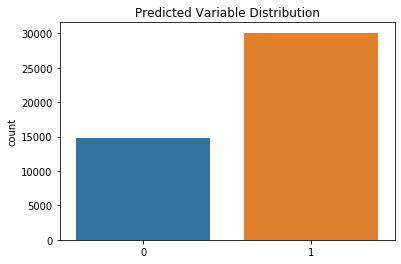

In [73]:
# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

# # Check the distribution of your predictions
sns.countplot([1 if x >= 0.5 else 0 for x in sub_file.target])
plt.title('Predicted Variable Distribution');

In [26]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline.csv', index = False)
sub_file.head()

,ID,target
0,ID_0000005111,0.91
1,ID_0000389416,0.56
2,ID_0000634789,0.48
3,ID_0000778100,0.88
4,ID_0001123210,0.43


In [27]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 0A54-AB6E

 Directory of C:\Users\User

03/27/2021  02:17 PM    <DIR>          .
03/27/2021  02:17 PM    <DIR>          ..
02/28/2021  11:21 AM    <DIR>          .conda
02/28/2021  09:53 AM                60 .condarc
03/27/2021  02:17 PM    <DIR>          .ipynb_checkpoints
02/27/2021  09:36 AM    <DIR>          .ipython
02/28/2021  01:57 AM    <DIR>          .jupyter
02/28/2021  09:42 AM    <DIR>          .keras
02/28/2021  10:12 AM    <DIR>          .matplotlib
02/27/2021  09:48 AM    <DIR>          .pylint.d
03/27/2021  09:07 AM    <DIR>          .VirtualBox
02/26/2021  05:25 PM    <DIR>          .vscode
03/02/2021  02:52 AM    <DIR>          3D Objects
03/27/2021  10:13 AM    <DIR>          anacond3
03/27/2021  02:15 PM           902,942 Baseline.csv
03/02/2021  02:52 AM    <DIR>          Contacts
07/20/2020  02:40 PM    <DIR>          Documents
03/27/2021  10:18 AM    <DIR>          Downloads
03/02/2021  12:16 PM           